# [LAB 10] 07.대응표본 T TEST 연습문제


#### [0] 준비 작업

| 표본 유형            | 정규성  | 등분산성 | 사용해야 하는 검정                    |
|----------------------|---------|-----------|----------------------------------------|
| 단일표본            | ✓ 총족  | –         | One-sample t-test                      |
| 단일표본            | ✗ 불충족 | –         | Wilcoxon signed-rank test              |
| 독립표본            | ✓ 총족  | ✓ 총족    | Student’s independent t-test           |
| 독립표본            | ✓ 총족  | ✗ 불충족  | Welch’s t-test                         |
| 독립표본            | ✗ 불충족 | –         | Mann–Whitney U test                    |
| 대응표본(쌍체표본)   | ✓ 총족  | –         | Paired t-test                          |
| 대응표본(쌍체표본)   | ✗ 불충족 | –         | Wilcoxon signed-rank test              |

※ 단일 표본, 대응 표본은 등분산성 개념이 없음


In [2]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt
from scipy.stats import t, normaltest, bartlett, levene, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator
import numpy as np


#### [0] 그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

### 문제 1 
blood_pressure 데이터셋은 부인 15명을 대상으로 평상시 혈압을 측정한 뒤,이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터이다.

이 데이터를 통해 피임약 복용이 혈압에 영향을 주는지 분석하라.

> 차이값에 대한 t 통계량의 값이 3.105 이고, 이에 대응되는 유의 확률이 0.004 이므로 귀무가설을 기각하고 대립가설을 채택한다. 

> 즉 복용 후의 평균 혈압이 더 높다


> 특정 표본의 각 사례에 대응하는 2개의 관측치를 통해 판단
> 한 집단의 BEFORE 와 AFTER 를 비교하는 것으로 PAIRED SAMPLE T TEST 라 부를 수 있다

#### [1] 데이터 가져오기

In [4]:
blood_pressure = load_data('blood_pressure')
blood_pressure

[data] https://data.hossam.kr/data/lab10_/blood_pressure.xlsx
[desc] 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


#### [2] 신뢰구간 확인

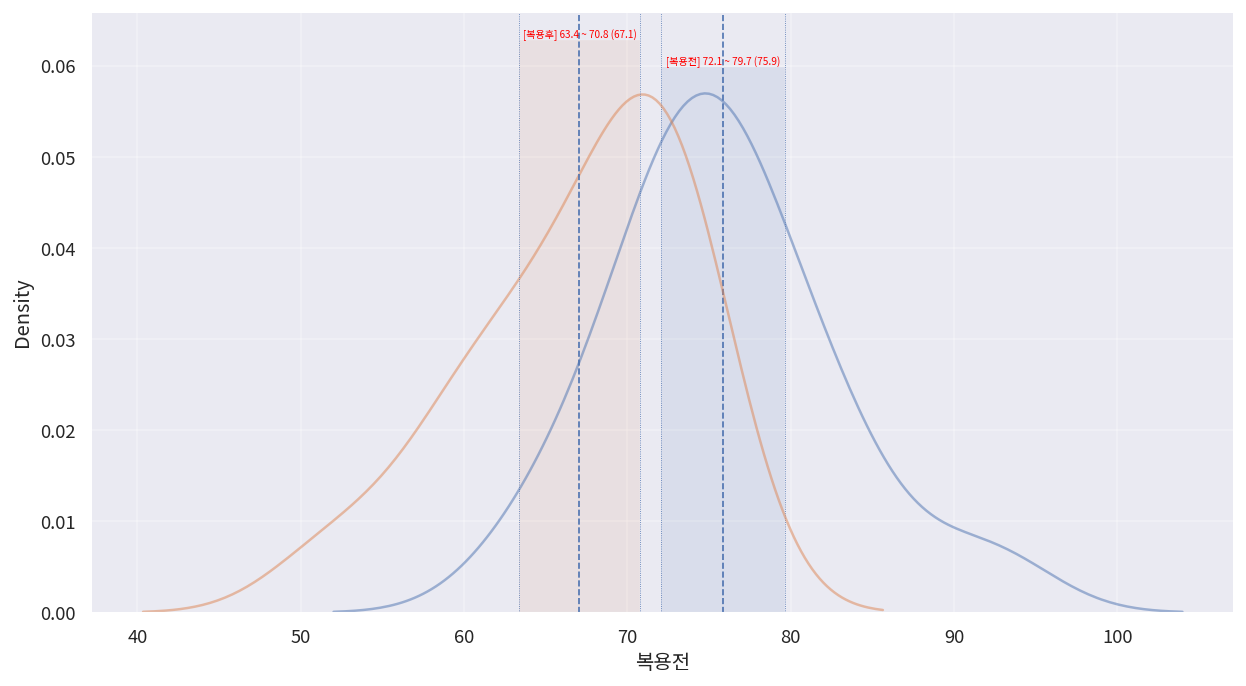

In [5]:
data = blood_pressure[['복용전','복용후']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


> 두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포가 서로 다르다고 할 수 있따.
> 또한 두 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다

#### [3] 가설 검정의 가정 확인

In [6]:
# 검사하려는 데이터 추출
data = blood_pressure[['복용전', '복용후']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
복용전,2.590682,0.273805,True
복용후,2.656338,0.264962,True
Bartlett,1.013185,0.314141,True


> 정규성과 등분산성이 확인되었으므로 T TEST 를 진행하여도 무방하다

#### [4] 복용 전 후의 혈압의 평균이 다른지 검정
두 그룹간의 평균을 비교하기 위해 alternative 파라미터를 two sided 로 설정한다

귀무가설 : 피임약 복용 전/후의 혈압의 평균에는 변화가 없다
대립가설 : 피임약 복용 전/후의 혈압의 평균에는 변화가 있다

In [7]:
s, p = ttest_rel(blood_pressure['복용전'], blood_pressure['복용후'],alternative = 'two-sided') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3.105, p-value: 0.008, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 3.105 이고, 이에 대응되는 유의 확률이 0.008 이므로 귀무가설을 기각하고 대립가설을 채택한다. 
>
> 즉 복용 전후의 혈압의 평규에는 차이가 존재한다

<alternative = greater>
귀무가설 : 피임약 복용 전 평균 혈압은 복용 후의 평균 혈압과 같거나 더 낮다
대립가설 : 피임약 복용 전 평균 혈압은 복용 후의 평균 혈압 보다 더 높다

In [8]:
s, p = ttest_rel(blood_pressure['복용전'], blood_pressure['복용후'],alternative = 'greater') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3.105, p-value: 0.004, 대립가설 채택'

> 차이값에 대한 t 통계량의 값이 3.105 이고, 이에 대응되는 유의 확률이 0.004 이므로 귀무가설을 기각하고 대립가설을 채택한다. 
>
> 즉 복용 전의 평균 혈압이 더 높다

<alternative = less>
귀무가설 : 피임약 복용 전 평균 혈압은 복용 후의 평균 혈압보다 같거나 더 높다
대립가설 : 피임약 복용 전 평균 혈압은 복용 후의 평균 혈압보다 더 낮다

In [9]:
s, p = ttest_rel(blood_pressure['복용전'], blood_pressure['복용후'],alternative = 'less') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3.105, p-value: 0.996, 귀무가설 채택'

### 문제 2 
cookie_cats 데이터 셋은 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데
이터이다.

개편 이전 버전을 A로 표시하고 개편 후 버전을 B로 표시하였다.
플레이 시간이 월등하게 많은 해비유저들을 제외한 일반유저들을 대상으로 이번 개편이 플레이 시간에 어떤 영향을 주었는지 알고자 한다.

게임의 개편이 유저들의 플레이 시간에 어떤 영향을 주었는지 분석하라.


개편전이 NaN 인 경우 > 신규 유입 유저
개편후가 NaN 인 경우 > 이용 중지 유저




#### [1] 데이터 가져오기

1.데이터를 가져온다
2. pivot 함수로 A 와 B 의 열을 만든다
3. 이상치를 0으로 만든다
4. 남은 항목들에 LOG 를 취한다
5. 그러고 시각화했더니....? 신뢰수준 안에 평균도 안들어오고 정규분포도 안따른다

In [10]:
cookie_cats = load_data('cookie_cats')
cookie_cats

[data] https://data.hossam.kr/data/lab10_/cookie_cats.xlsx
[desc] 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
...,...,...,...
90184,9999441,B,97
90185,9999479,B,30
90186,9999710,A,28
90187,9999768,B,51


# 박스 플럿

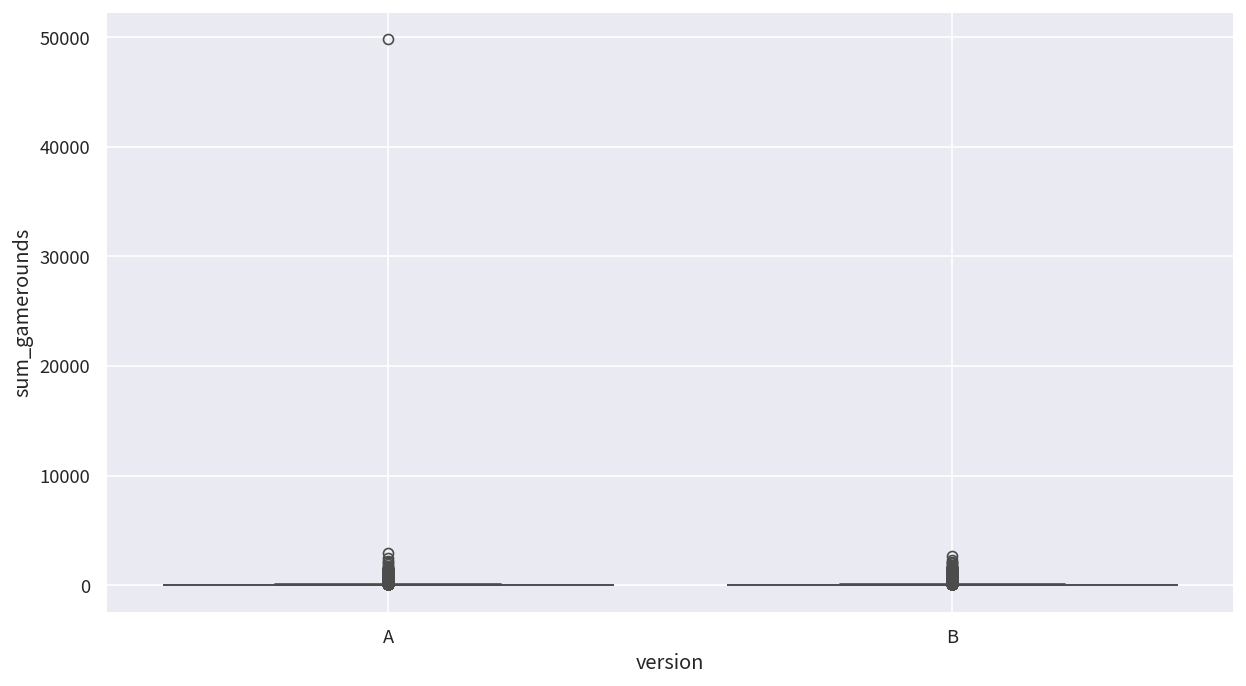

In [11]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=cookie_cats, x='version', y='sum_gamerounds', hue='version', orient="v")

# 3) 그래프 꾸미기
ax.grid(True)        

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


In [12]:
Q1 = cookie_cats['sum_gamerounds'].quantile(0.25)
Q3 = cookie_cats['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

# IQR 기준 필터링
df_no_outlier = cookie_cats[
    (cookie_cats['sum_gamerounds'] >= Q1 - 1.5 * IQR) &
    (cookie_cats['sum_gamerounds'] <= Q3 + 1.5 * IQR)
]


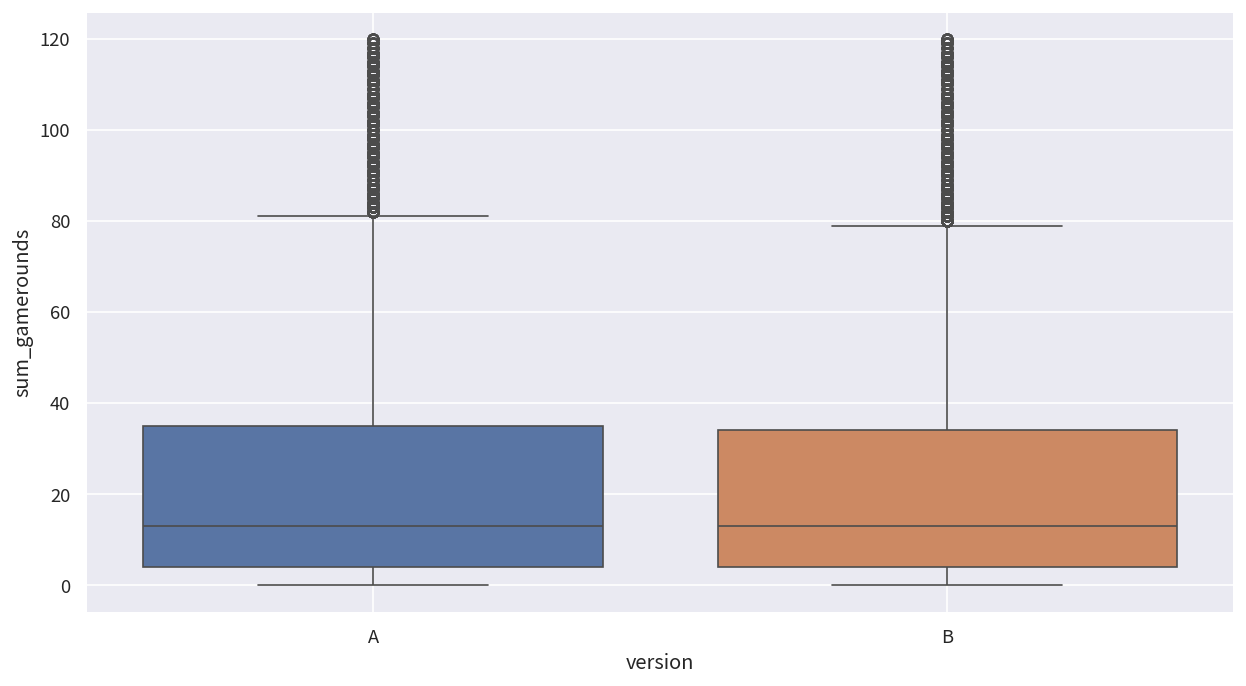

In [13]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=df_no_outlier, x='version', y='sum_gamerounds', hue='version', orient="v")

# 3) 그래프 꾸미기
ax.grid(True)        

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


In [14]:
#데이터 전처리
df_wide = df_no_outlier.pivot(
    index='userid',
    columns='version',
    values='sum_gamerounds'
)
df_wide = df_wide.fillna(0)

df_wide


version,A,B
userid,,
116,3.0,0.0
337,38.0,0.0
483,0.0,1.0
1066,0.0,0.0
1444,0.0,2.0
...,...,...
9999441,0.0,97.0
9999479,0.0,30.0
9999710,28.0,0.0


#### [2] 신뢰구간 확인

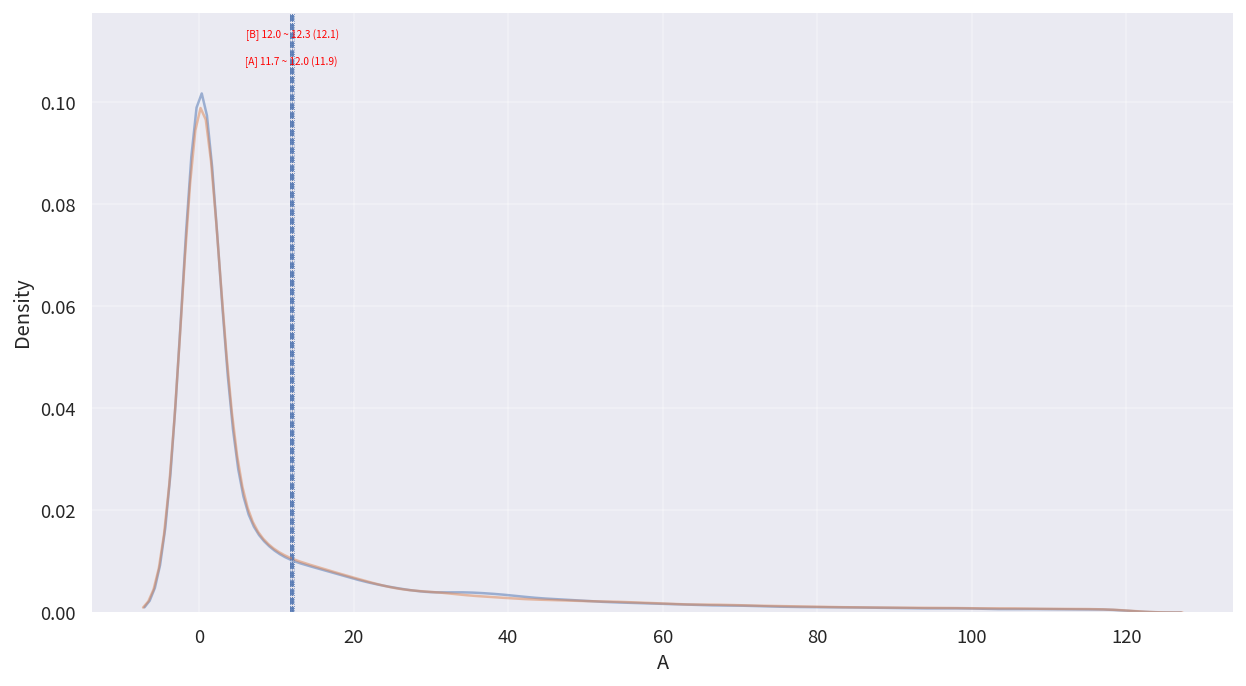

In [15]:
data = df_wide[['A','B']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


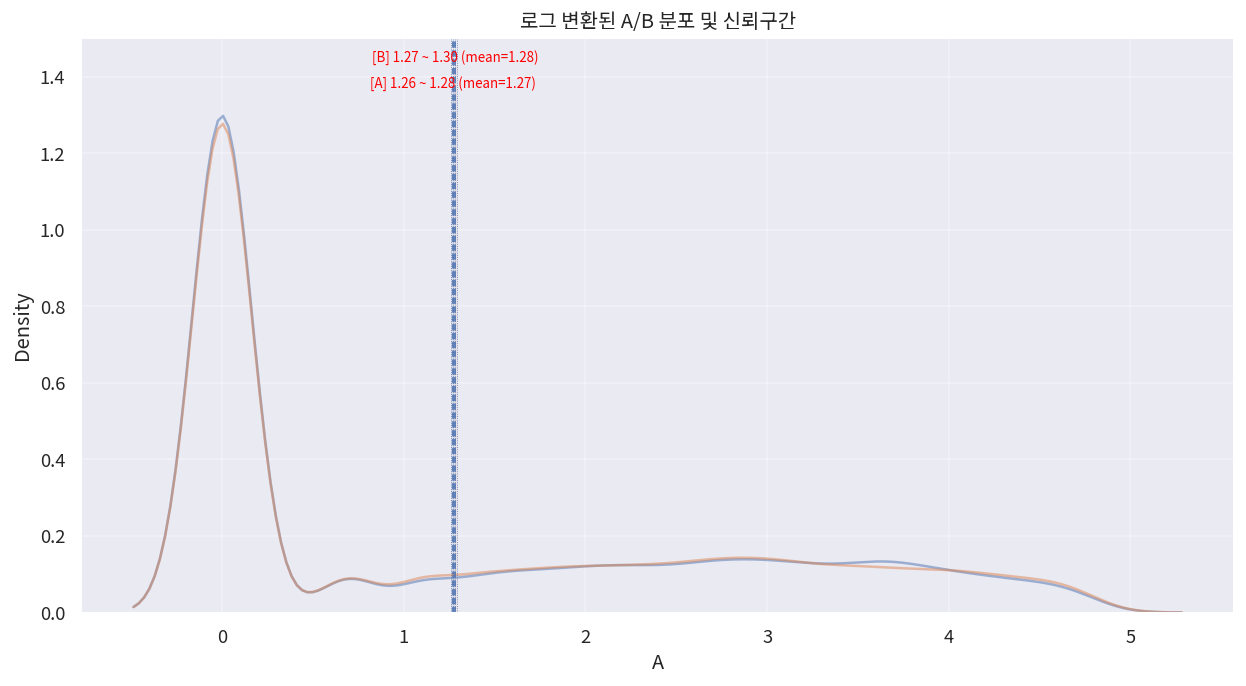

In [16]:
data_log = np.log1p(data)   # log(1+x), 0 안전 처리


# 🔹 로그 변환된 데이터 만들기 (0도 안전하게 변환)
data_log = np.log1p(df_wide[['A','B']])

# 1) 그래프 초기화
width_px  = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data_log.columns:

    # KDE Plot
    sb.kdeplot(data=data_log, x=c, fill=False, alpha=0.5)

    # 신뢰구간 계산
    clevel = 0.95
    dof = len(data_log[c]) - 1
    sp_mean = data_log[c].mean()
    sp_std = data_log[c].std(ddof=1)
    sp_std_error = sp_std / sqrt(len(data_log[c]))

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    # Vertical lines
    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # fill between CI
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # mean line
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # Text
    ax.text(x=(cmax-cmin)/2 + cmin,
            y=ymax,
            s=f"[{c}] {cmin:.2f} ~ {cmax:.2f} (mean={sp_mean:.2f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 8, "color": "red"})

# 그래프 꾸미기
ax.set_title("로그 변환된 A/B 분포 및 신뢰구간")
ax.grid(True, alpha=0.3)

# 출력
plt.tight_layout()
plt.show()
plt.close()



In [17]:
# 검사하려는 데이터 추출
data = data_log[['A', 'B']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
A,20641.003367,0.000000,False
B,19803.456161,0.000000,False
Levene,3.626305,0.056875,True


In [18]:
s, p = mannwhitneyu(data_log['A'], data_log['B'],alternative = 'two-sided') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 3181395064.000, p-value: 0.022, 대립가설 채택'

mannwhitneyu 는 비모수적 검정으로 정규분포를 따르지 않아도 사용이 가능하다


### 문제 3
runner_diet 데이터셋은 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후

100m 달리기를 실시한 결과를 조사한 데이터이다. 이를 통해 고등학교 육상선수에게 체중감량을 시키면 달리기에 어떤 변화가 일어나는지 조사하고자 한다.

감량 전과 후에 달리기 속도에 차이가 있는지 분석하라

> 같은 대상들에 대해 전후 비교이므로 대응표본 T TEST

In [19]:
runner_diet = load_data('runner_diet')
runner_diet

[data] https://data.hossam.kr/data/lab10_/runner_diet.xlsx
[desc] 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시한 결과를 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


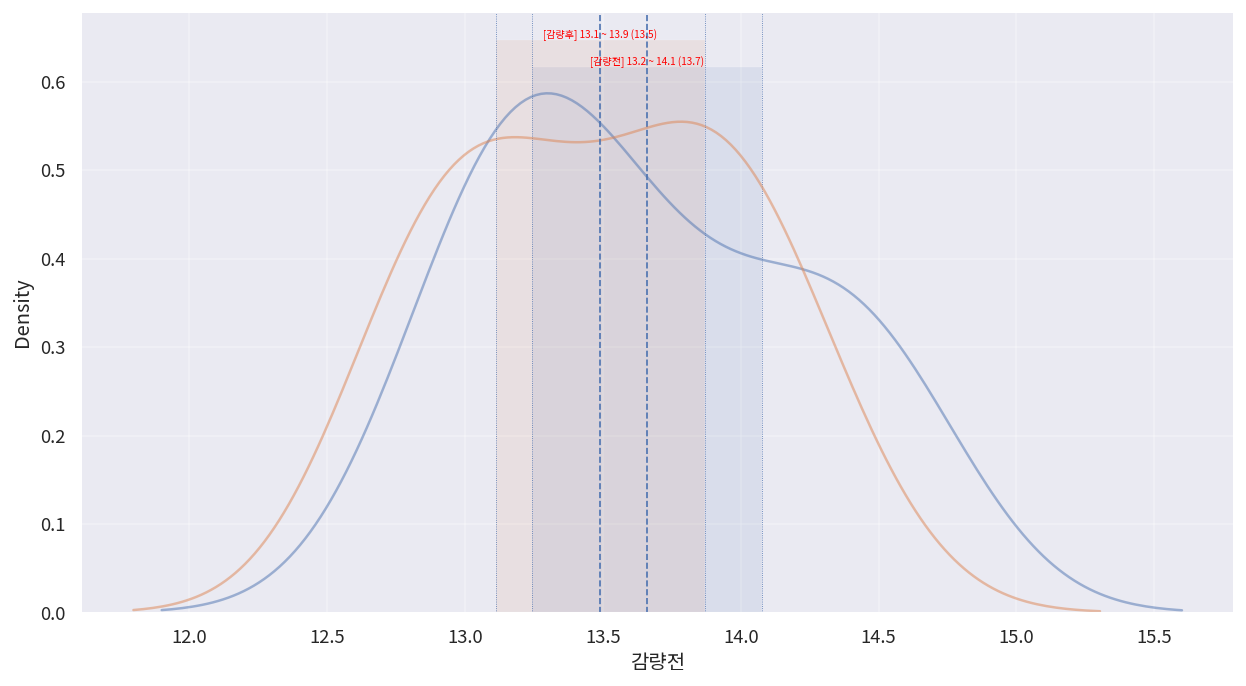

In [20]:
data = runner_diet[['감량전','감량후']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


In [21]:
# 검사하려는 데이터 추출
data = runner_diet[['감량전', '감량후']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
감량전,2.063078,0.356458,True
감량후,1.646609,0.438979,True
Bartlett,0.073124,0.786842,True


> 데이터가 정규성과 등분산성을 모두 만족한다 > ttest_rel 을 시행한다

In [47]:
s, p = ttest_rel(runner_diet['감량전'], runner_diet['감량후'],alternative = 'two-sided') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.375, p-value: 0.042, 대립가설 채택'

> 대응표본 검정결과에서 P 값이 0.42로 유의수준 0.05보다 작으므로 차이가 있다는 대립가설을 채택한다.
>
> 즉, 감량전후의 차이가 존재한다

귀무가설:감량전의 평균 값은 감량전의 평균값보다 작지 않다
대립가설:감량전의 평균 값은 감량전의 평균값보다 작다.

> 귀무가설 채택


In [48]:
s, p = ttest_rel(runner_diet['감량전'], runner_diet['감량후'],alternative = 'less') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.375, p-value: 0.979, 귀무가설 채택'

귀무가설:감량전의 평균 값은 감량전의 평균값보다 크지 않다
대립가설:감량전의 평균 값은 감량전의 평균값보다 크다

> 대립가설 채택


In [49]:
s, p = ttest_rel(runner_diet['감량전'], runner_diet['감량후'],alternative = 'greater') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 2.375, p-value: 0.021, 대립가설 채택'

### 문제4

wrestler_diet 데이터셋은 고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 얻은 데이터이다.

감량 전과 감량 후 간에 차이가 있는가의 대응비교를 악력, 윗몸일으키기, 턱걸이에 대하여 실시
하고 분석하라.


#### 악력 데이터
> 감량전/후의 평균 악령은 차이 없었음

#### 윗몸 일으키기
>   감량 후 윗몸일으키기 평균 횟수가 유의미하게 늘었다 (p value 0.002)

### 턱걸이 데이터
> 감량전 턱걸이 평균 횟수와 감량후 턱걸이 평균 횟수에 차이가 없다

In [23]:
wrestler_diet =load_data('wrestler_diet')
wrestler_diet

[data] https://data.hossam.kr/data/lab10_/wrestler_diet.xlsx
[desc] 고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 얻은 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,이름,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
0,B.S,43,41,35,41,25,29
1,P.J,42,41,40,44,25,29
2,G.G,52,50,36,41,22,23
3,A.L,53,52,38,42,10,15
4,I.H,44,40,36,42,15,19
5,B.Y,46,47,39,44,17,19
6,I.K,48,47,35,42,24,26
7,K.B,58,55,34,36,17,18
8,K.J,50,50,33,35,17,20
9,S.S,48,50,39,45,21,25


### 악력 데이터
> 감량전/후의 평균 악령은 차이 없었음

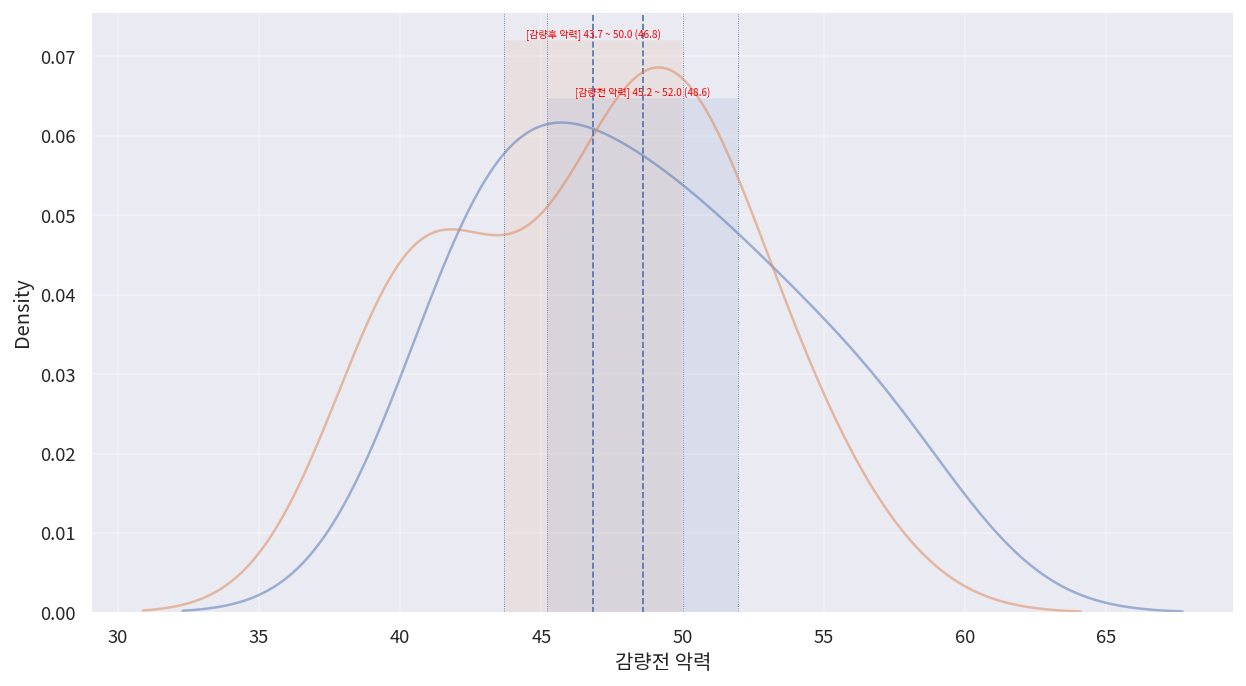

In [24]:
data = wrestler_diet[['감량전 악력','감량후 악력']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


In [25]:
# 검사하려는 데이터 추출
data = wrestler_diet[['감량전 악력', '감량후 악력']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
감량전 악력,1.146496,0.563692,True
감량후 악력,1.358430,0.507015,True
Bartlett,1.049480,0.305627,True


In [26]:
s, p = mannwhitneyu(wrestler_diet['감량전 악력'], wrestler_diet['감량후 악력']) #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 87.000, p-value: 0.400, 귀무가설 채택'

### 윗몸일으키기 데이터

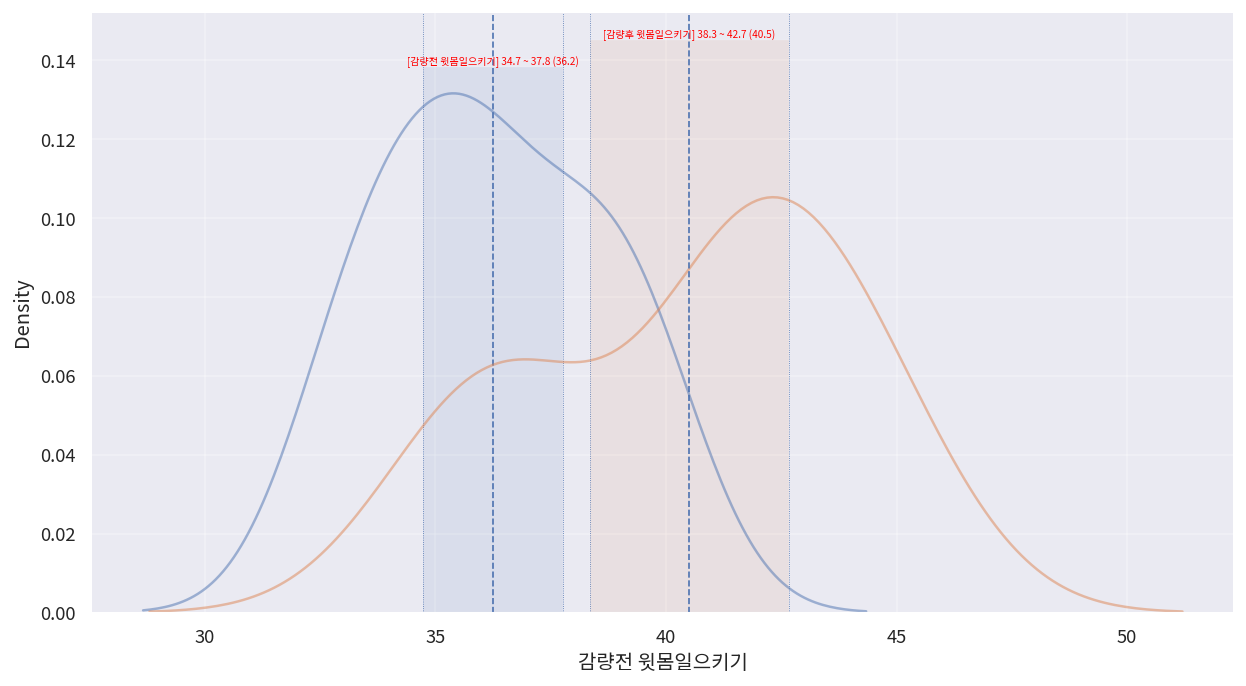

In [27]:
data = wrestler_diet[['감량전 윗몸일으키기','감량후 윗몸일으키기']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


In [28]:
# 검사하려는 데이터 추출
data = wrestler_diet[['감량전 윗몸일으키기', '감량후 윗몸일으키기']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
감량전 윗몸일으키기,1.362864,0.505892,True
감량후 윗몸일으키기,2.007707,0.366465,True
Bartlett,2.214826,0.136690,True


In [29]:
s, p = mannwhitneyu(wrestler_diet['감량전 윗몸일으키기'], wrestler_diet['감량후 윗몸일으키기']) #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 23.000, p-value: 0.005, 대립가설 채택'

In [30]:
s, p = mannwhitneyu(wrestler_diet['감량전 윗몸일으키기'], wrestler_diet['감량후 윗몸일으키기'],alternative = 'greater') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 23.000, p-value: 0.998, 귀무가설 채택'

귀무가설 : 감량전 윗몸 일으키기 평균 수는 감량후의 윗몸 일으키기 평균 수보다 크거나 같다
대립가설 : 감량전 윗몸 일으키기 평균 수는 감량후의 윗몸 일으키기 평균 수보다 적다

In [31]:
s, p = mannwhitneyu(wrestler_diet['감량전 윗몸일으키기'], wrestler_diet['감량후 윗몸일으키기'],alternative = 'less') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 23.000, p-value: 0.002, 대립가설 채택'

>   감량 후 윗몸일으키기 평균 횟수가 유의미하게 늘었다 (p value 0.002)

### 턱걸이 데이터
> 감량전 턱걸이 평균 횟수와 감량후 턱걸이 평균 횟수에 차이가 없다

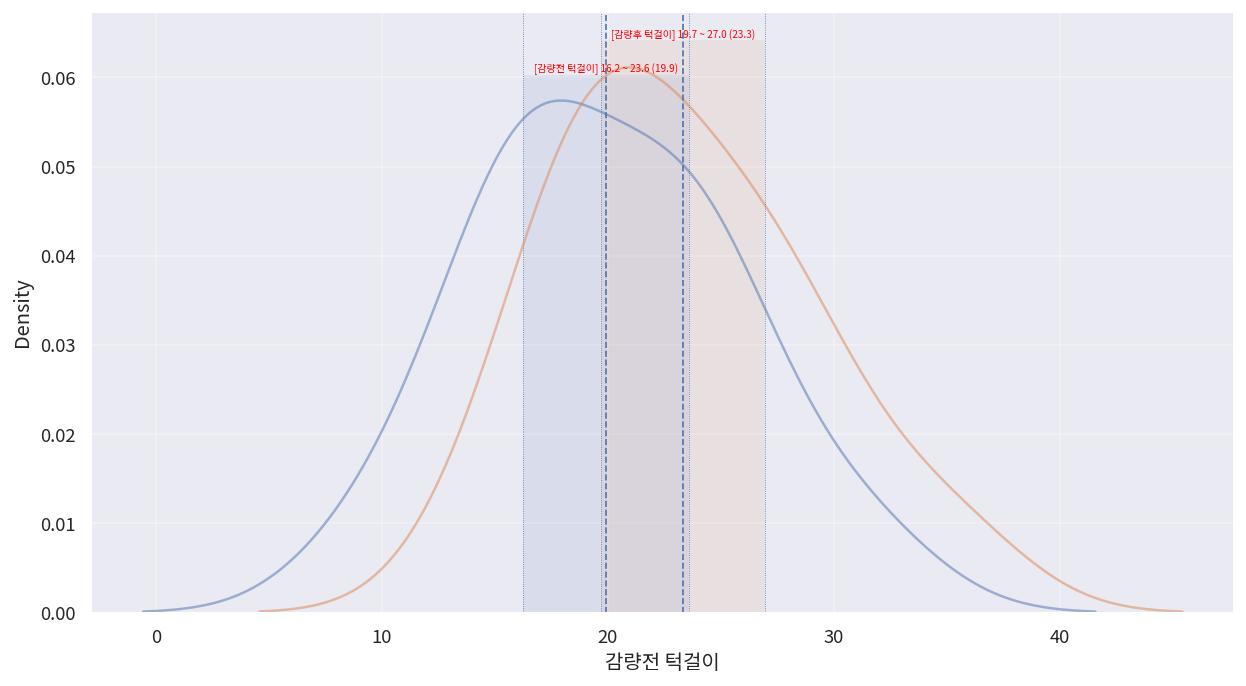

In [32]:
data = wrestler_diet[['감량전 턱걸이','감량후 턱걸이']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


In [33]:
# 검사하려는 데이터 추출
data = wrestler_diet[['감량전 턱걸이', '감량후 턱걸이']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
감량전 턱걸이,0.154328,0.925738,True
감량후 턱걸이,1.021094,0.600167,True
Bartlett,0.883029,0.347373,True


In [34]:
s, p = mannwhitneyu(wrestler_diet['감량전 턱걸이'], wrestler_diet['감량후 턱걸이']) #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 47.500, p-value: 0.164, 귀무가설 채택'

> 감량전 턱걸이 평균 횟수와 감량후 턱걸이 평균 횟수에 차이가 없다

### 문제 5 
- 서울시에서 정의하는 상권의 종류는 발달상권, 골목상권, 관광특구, 전통시장이 있다.

- commercial 데이터는 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료이다.

- 주어진 데이터를 활용하여 서울시 골목상권의 2023년 상반기(1,2분기)와 하반기(3,4분기) 
매출액이 어떤 차이를 보이는지 분석하라.

- 주어진 데이터는 서울시에서 제공하는 집계가 완료된 데이터이므로 모든 결측치는 없는 상태이며 
이상치도 실제 매출액 데이터이므로 별도의 정제 과정 없이 진행하는 것으로 한다

In [35]:
commercial =load_data('commercial')
commercial

[data] https://data.hossam.kr/data/lab10_/commercial.xlsx
[desc] 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료 (출처: 서울 열린데이터 광장)
[!] Cannot read metadata


,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166
...,...,...,...,...,...,...
6217,4,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,4,3130324,전통시장,길동복조리시장,6236556030,330148
6219,4,3130325,전통시장,명일전통시장,3973269286,186049
6220,4,3130326,전통시장,고덕 골목형상점가,15013907999,755565


In [36]:
# type 을 골목상권으로 
origin_filtered1 = commercial.query ('type == "골목상권"')
origin_filtered1

,quarter,code,type,name,sales_amount,number_of_sales
6,1,3110001,골목상권,이북5도청사,435264344,13080
7,1,3110002,골목상권,독립문역 1번,4062721649,339647
8,1,3110003,골목상권,세검정초등학교,576819152,16978
9,1,3110004,골목상권,대신고등학교,312840339,7706
10,1,3110005,골목상권,세검정,666679997,10162
...,...,...,...,...,...,...
5690,4,3111086,골목상권,한영중고,4733024545,196999
5691,4,3111087,골목상권,고덕중학교(고덕2동주민센터),1644486933,65056
5692,4,3111088,골목상권,고덕동성당,2953618538,158690
5693,4,3111089,골목상권,상일여고(상일초등학교),12713570299,430385


In [37]:
origin_filtered1['반기'] = np.where(origin_filtered1['quarter'].isin([1,2]), '상반기', '하반기')
origin_filtered1


C:\Users\itwill\AppData\Local\Temp\ipykernel_27656\3680391503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_filtered1['반기'] = np.where(origin_filtered1['quarter'].isin([1,2]), '상반기', '하반기')


,quarter,code,type,name,sales_amount,number_of_sales,반기
6,1,3110001,골목상권,이북5도청사,435264344,13080,상반기
7,1,3110002,골목상권,독립문역 1번,4062721649,339647,상반기
8,1,3110003,골목상권,세검정초등학교,576819152,16978,상반기
9,1,3110004,골목상권,대신고등학교,312840339,7706,상반기
10,1,3110005,골목상권,세검정,666679997,10162,상반기
...,...,...,...,...,...,...,...
5690,4,3111086,골목상권,한영중고,4733024545,196999,하반기
5691,4,3111087,골목상권,고덕중학교(고덕2동주민센터),1644486933,65056,하반기
5692,4,3111088,골목상권,고덕동성당,2953618538,158690,하반기
5693,4,3111089,골목상권,상일여고(상일초등학교),12713570299,430385,하반기


In [38]:


# 1) 상/하반기 pivot
origin_filtered2 = origin_filtered1.pivot_table(
    index='code',
    columns='반기',
    values='sales_amount',
    aggfunc='sum'
)

# 2) 상/하반기 둘 다 있는 점포만 선택
paired = origin_filtered2.dropna(subset=['상반기', '하반기'])

# 3) 로그 변환 (log(1+x) → 0값도 처리 가능)
paired_log = np.log1p(paired[['상반기', '하반기']])

paired_log


반기,상반기,하반기
code,,
3110001,20.871331,21.001249
3110002,23.088669,23.394065
3110003,21.214095,21.387408
3110004,20.445183,20.496987
3110005,21.113861,21.203472
...,...,...
3111086,22.815765,22.996608
3111087,21.690792,21.810345
3111088,22.576016,22.496856


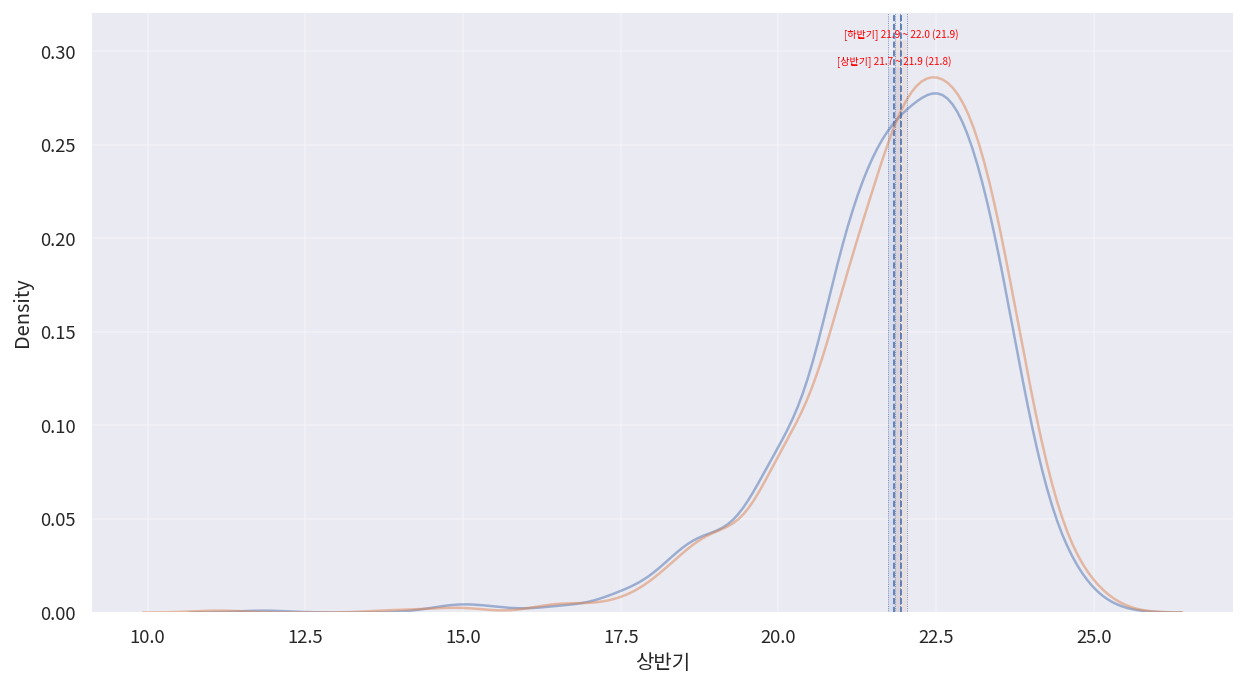

In [39]:
data = paired_log[['상반기','하반기']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


In [40]:
# 검사하려는 데이터 추출
data = paired_log[['상반기', '하반기']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
상반기,242.991290,1.718351e-53,False
하반기,277.947601,4.410068e-61,False
Levene,0.060617,8.055480e-01,True


In [41]:
s, p = mannwhitneyu(paired_log['상반기'], paired_log['하반기'],alternative = 'two-sided') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 497637.000, p-value: 0.055, 귀무가설 채택'

### 연습문제 6

'adult_height' 데이터 셋은 성인 30명의 성별과 신장 데이터이다
다음 물음데 답하시오

(1) 귀무가설과 대립가설은 각각 무엇인가
(2) (1) 번의 가설을 검정하고 결과를 해석하시오

--> 지금까지 학습한 세 가지 검정방법 중에서 어떤 방법을 사용해야 하는지 판단해서 진행하세요


> 서로 다른 두 개의 그룹간 평균의 차이가 유의미한지 여부를 판단해야하기 떄문에
이표본 검정 (독힙 표본 t 검정)




In [42]:
blood_pressure = load_data('adult_height')
blood_pressure

[data] https://data.hossam.kr/data/lab10_/adult_height.xlsx
[desc] 성인 30명의 성별(sex), 신장(height) 데이터 (출처: 방송통신대학교 바이오통계학)
[!] Cannot read metadata


,sex,height
0,F,161
1,F,160
2,F,164
3,F,172
4,F,157
5,F,164
6,F,166
7,F,169
8,F,166
9,F,164


In [43]:
# 각 성별별로 순번(index) 생성
blood_pressure['idx'] = blood_pressure.groupby('sex').cumcount()

# 피벗 테이블 생성
blood_pressure_wide = blood_pressure.pivot(
    index='idx',
    columns='sex',
    values='height'
)

blood_pressure_wide


sex,F,M
idx,,
0,161,166
1,160,157
2,164,171
3,172,174
4,157,170
5,164,172
6,166,165
7,169,182
8,166,170


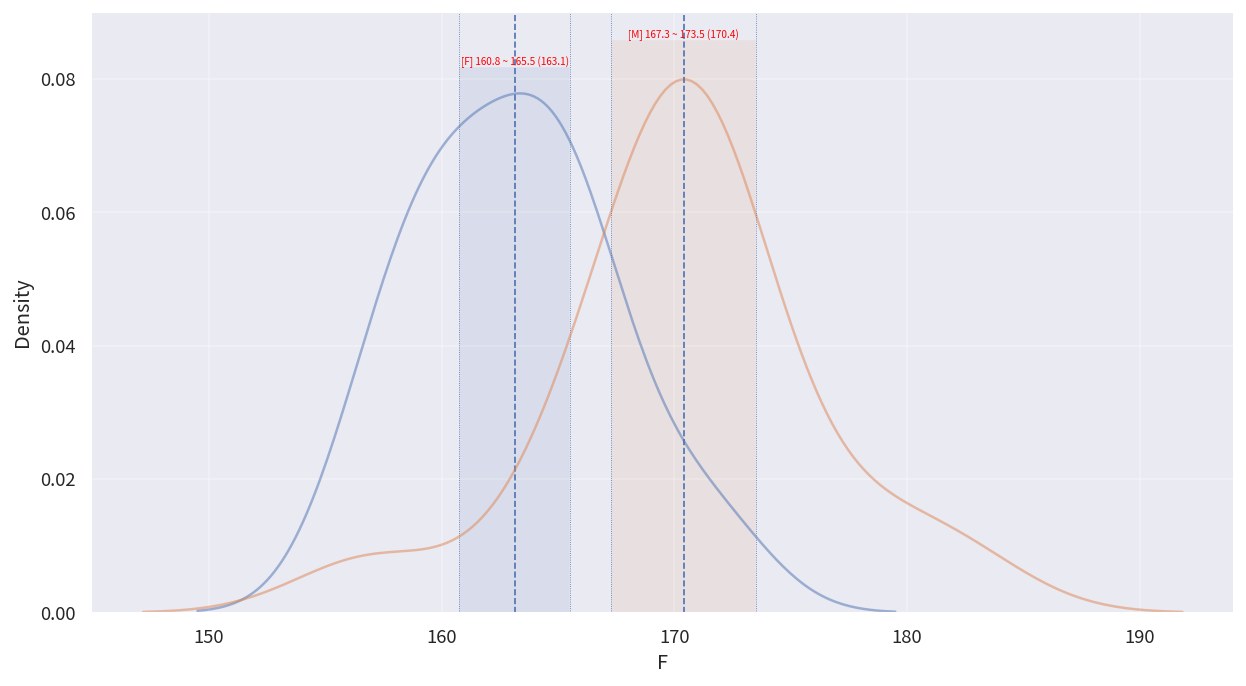

In [44]:
data = blood_pressure_wide[['F','M']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


In [45]:
# 검사하려는 데이터 추출
data = blood_pressure_wide[['F', 'M']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })

    normal_dist = normal_dist and normalize


# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"               # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T)   # 모든 컬럼의 데이터를 한 번에 전달
    else:
        n = "Levene"                 # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*data.values.T, center="median")

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index("field")
report_df


,statistic,p-value,result
field,,,
F,0.478834,0.787086,True
M,3.245853,0.197320,True
Bartlett,2.055126,0.151695,True


In [46]:
s, p = mannwhitneyu(blood_pressure_wide['F'], blood_pressure_wide['M'],alternative = 'two-sided') #alternative='less' / 'greater'
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 32.000, p-value: 0.001, 대립가설 채택'